<a href="https://colab.research.google.com/github/alloysArtifexLabs/IMAGE-AI/blob/image-classifier/CIFAR100_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.0499 - loss: 4.2695 - val_accuracy: 0.1623 - val_loss: 3.5183
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.1814 - loss: 3.4139 - val_accuracy: 0.2299 - val_loss: 3.1693
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.2411 - loss: 3.0770 - val_accuracy: 0.2681 - val_loss: 2.9634
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.2897 - loss: 2.8516 - val_accuracy: 0.2959 - val_loss: 2.8335
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3220 - loss: 2.6938 - val_accuracy: 0.3110 - val_loss: 2.7478
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3440 - loss: 2.5744 - val_accuracy: 0.3179 - val_loss: 2.7125
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3640 - loss: 2.4800 - val_accuracy: 0.3288 - val_loss: 2.6837
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.3802 - loss: 2.


Test accuracy: 0.3366

Model saved to 'cifar100_cnn_model.h5'.
Model loaded from 'cifar100_cnn_model.h5'.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


<ipython-input-1-03448f1fb77d>:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label = class_names[int(y_test[i])]


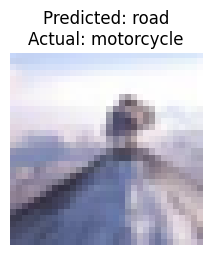

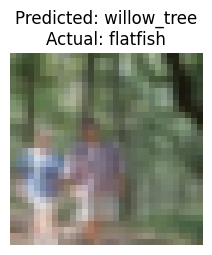

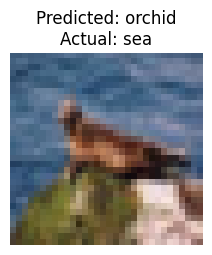

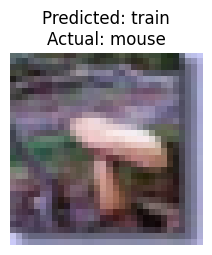

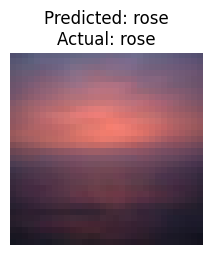

In [1]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility (optional)
tf.random.set_seed(42)

# Load the CIFAR-100 dataset (using 'fine' labels)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

# Preprocess the data by normalizing pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Build a Convolutional Neural Network (CNN) model
model = tf.keras.models.Sequential([
    # First convolutional layer; input shape inferred from training data
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Third convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the output from convolutional layers to feed into the dense layers
    tf.keras.layers.Flatten(),

    # Fully connected layer
    tf.keras.layers.Dense(64, activation='relu'),

    # Output layer with 100 units (one per CIFAR-100 class)
    # No activation function is used here because we'll apply the loss function on raw logits.
    tf.keras.layers.Dense(100)
])

# Compile the model using Adam optimizer and SparseCategoricalCrossentropy loss.
# Using from_logits=True because the model outputs raw logits.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model for at least 10 epochs. Validation is performed on the test set.
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on the test set and print the test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# Save the trained model to a file in .h5 format
model.save('cifar100_cnn_model.h5')
print("\nModel saved to 'cifar100_cnn_model.h5'.")

# Load the saved model from file
loaded_model = tf.keras.models.load_model('cifar100_cnn_model.h5')
print("Model loaded from 'cifar100_cnn_model.h5'.")

# Optional: Basic inference on a few test images
# Define the CIFAR-100 fine label class names for readability
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'cabbage',
    'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin',
    'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo',
    'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man',
    'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange',
    'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain',
    'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road',
    'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail',
    'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip',
    'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# Make predictions on the first 5 test images
predictions = loaded_model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)

# Plot the test images along with predicted and actual labels
for i in range(5):
    plt.figure(figsize=(2.5,2.5))
    plt.imshow(x_test[i])
    true_label = class_names[int(y_test[i])]
    pred_label = class_names[predicted_labels[i]]
    plt.title(f'Predicted: {pred_label}\nActual: {true_label}')
    plt.axis('off')
    plt.show()
